In [1]:
import zipfile
import os

## --- DOWNLOAD DATASET 

import pathlib
import os
# mount google drive to download dataset
from google.colab import drive
if not os.path.isdir("/content/train"):
  os.mkdir("/content/train")
drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/ML Datasets/pill_photoes.tgz' /content/train

# decompress the folder
import tarfile
my_tar = tarfile.open('/content/train/pill_photoes.tgz')
my_tar.extractall('/content/train') # specify which folder to extract to
my_tar.close()
data_dir = pathlib.Path("/content/train/pill_photos")
data_dir = pathlib.Path(os.path.abspath(pathlib.Path(data_dir)))
print(data_dir)
print(os.path.isdir(data_dir))

## --- DOWNLOAD DATASET

## -- VARIABLE DEFINITION

Mounted at /content/gdrive
/content/train/pill_photos
True


In [2]:
#  declare the location of our training and validation files
base_dir = '/content/train/pill_photos'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')

# correct and wrong folders for training
train_correct_dir = os.path.join(train_dir, 'correct')
train_wrong_dir = os.path.join(train_dir, 'wrong')

# correct and wrong folders for validation
validation_correct_dir = os.path.join(validation_dir, 'correct')
validation_wrong_dir = os.path.join(validation_dir, 'wrong')

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # since Conv2D is the first layer of the neural network, we should also specify the size of the input
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # apply pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # and repeat the process
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the result to feed it to the dense layer
    tf.keras.layers.Flatten(), 
    # and define 512 neurons for processing the output coming by the previous layers
    tf.keras.layers.Dense(512, activation='relu'), 
    # a single output neuron. The result will be 0 if the image is a correct, 1 if it is a wrong
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
import os
print(os.path.isdir(train_dir))
print(train_dir)
print(os.path.isdir(validation_dir))
print(validation_dir)

True
/content/train/pill_photos/train
True
/content/train/pill_photos/validate


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# we rescale all our images with the rescale parameter
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

# we use flow_from_directory to create a generator for training
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# we use flow_from_directory to create a generator for validation
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))

Found 20226 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [9]:
history = model.fit(
            train_generator, # pass in the training generator
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator, # pass in the validation generator
            validation_steps=50,
            verbose=2
            )

Epoch 1/15


100/100 - 45s - loss: 0.2101 - accuracy: 0.9225 - val_loss: 0.4161 - val_accuracy: 0.8765 - 45s/epoch - 449ms/step
Epoch 2/15
100/100 - 31s - loss: 0.0767 - accuracy: 0.9780 - 31s/epoch - 312ms/step
Epoch 3/15
100/100 - 34s - loss: 0.0830 - accuracy: 0.9815 - 34s/epoch - 338ms/step
Epoch 4/15
100/100 - 32s - loss: 0.0694 - accuracy: 0.9815 - 32s/epoch - 320ms/step
Epoch 5/15
100/100 - 34s - loss: 0.0520 - accuracy: 0.9825 - 34s/epoch - 337ms/step
Epoch 6/15
100/100 - 30s - loss: 0.0508 - accuracy: 0.9850 - 30s/epoch - 295ms/step
Epoch 7/15
100/100 - 30s - loss: 0.0290 - accuracy: 0.9925 - 30s/epoch - 303ms/step
Epoch 8/15
100/100 - 28s - loss: 0.0400 - accuracy: 0.9919 - 28s/epoch - 283ms/step
Epoch 9/15
100/100 - 34s - loss: 0.0399 - accuracy: 0.9890 - 34s/epoch - 344ms/step
Epoch 10/15
100/100 - 30s - loss: 0.0254 - accuracy: 0.9904 - 30s/epoch - 299ms/step
Epoch 11/15
100/100 - 36s - loss: 0.0260 - accuracy: 0.9935 - 36s/epoch - 355ms/step
Epoch 12/15
100/100 - 32s - loss: 0.0157 - 

1/1 [==============================] - 0s 103ms/step


<ipython-input-12-13ffb29ffd26>:50: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


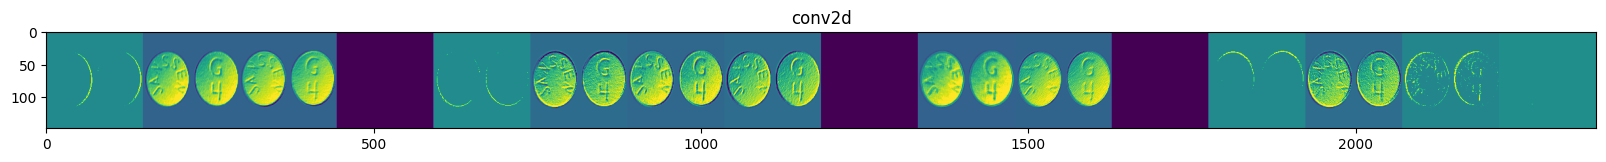

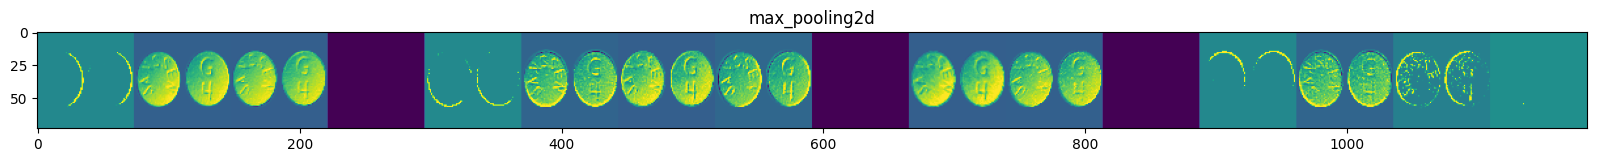

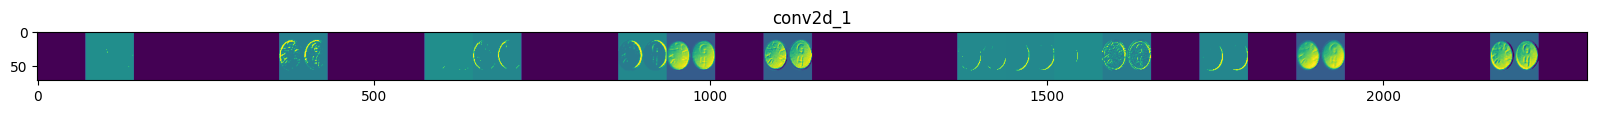

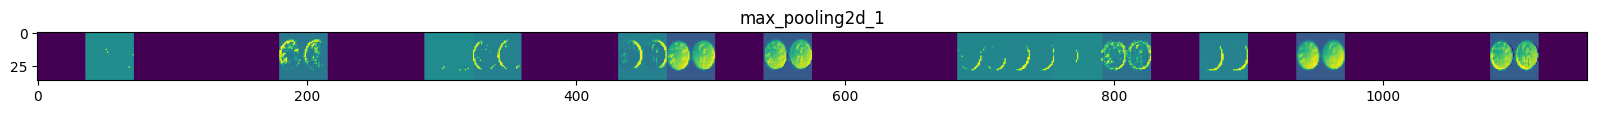

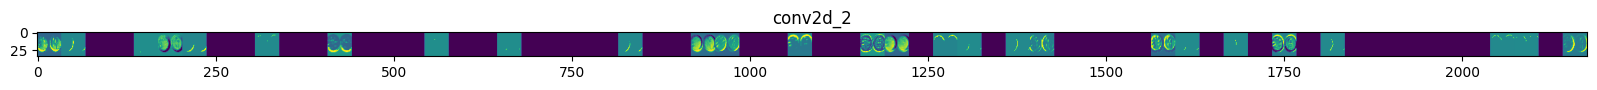

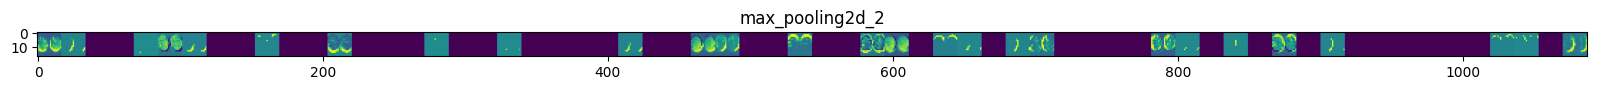

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import img_to_array, load_img

# we define a new custom Keras model that receives an input image
# and returns the representations of the layers of the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# prepare a random image from our dataset
train_correct_fnames = []
for (dirpath, dirnames, filenames) in os.walk(train_correct_dir):
    train_correct_fnames.extend(filenames)
train_wrong_fnames = []
for (dirpath, dirnames, filenames) in os.walk(train_wrong_dir):
    train_wrong_fnames.extend(filenames)
correct_img_files = [os.path.join(train_correct_dir, f) for f in train_correct_fnames]
wrong_img_files = [os.path.join(train_wrong_dir, f) for f in train_wrong_fnames]
img_path = random.choice(correct_img_files + wrong_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a raw image in PIL format
x   = img_to_array(img)                           # np array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # np array with shape  (1, 150, 150, 3)

# rescale pixel values 1/255
x /= 255.0

# by making calling the predict method we obtain
# the intermediate representations of this image from the previous model
successive_feature_maps = visualization_model.predict(x)

# let's map the layers of this model with their name
layer_names = [layer.name for layer in model.layers]

# plot everything
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4: # if it is a conv or pooling layer
    n_features = feature_map.shape[-1]  # n features
    size       = feature_map.shape[ 1]  # shape
    
    # create a grid to display the data
    display_grid = np.zeros((size, size * n_features))
    
    # some post-processing
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    # show the chart
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

ValueError: ignored

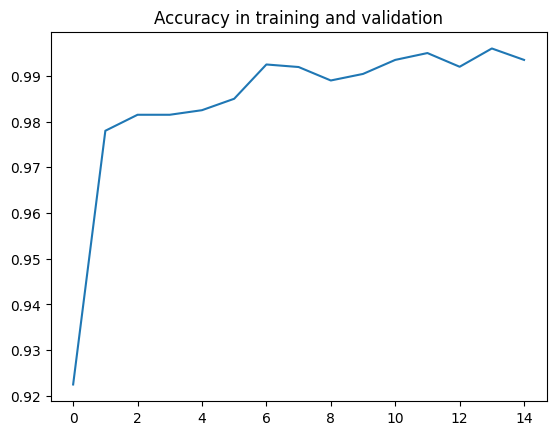

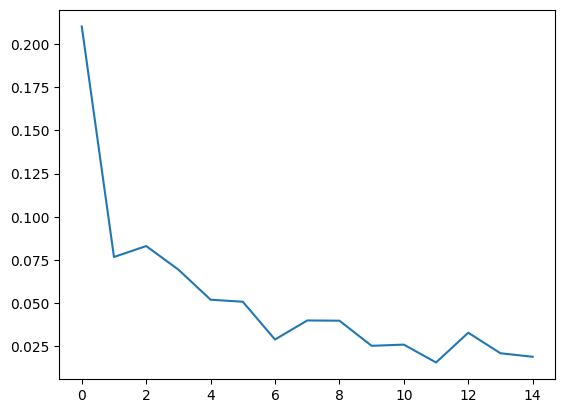

In [16]:
# get the metrics from history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
#plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [21]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediction on the uploaded image
  path = '/content/' + fn # load the image on Colab
  img = tf.keras.utils.load_img(path, target_size=(150, 150)) # let's use load_img to scale it 
  
  # scaling process
  x = tf.keras.utils.img_to_array(img)
  x /= 255 
  x = np.expand_dims(x, axis=0)
  # flatten the output
  images = np.vstack([x])
  
  # prediction!
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0] > 0.5:
    print(fn + " is wrong!")
  else:
    print(fn + " is correct!")

Saving IMG_4496.jpg to IMG_4496.jpg
1/1 [==============================] - 0s 22ms/step
[0.0018129]
IMG_4496.jpg is correct!


In [22]:
model.save_weights('./checkpoints/my_checkpoint')

In [23]:
model.save('saved_model/my_model')

In [25]:
import shutil
shutil.make_archive("sample1_tf_model_saved", 'zip', "saved_model")

'/content/sample1_tf_model_saved.zip'